# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-9-124-A-rep1_CRR_DiadFit,103.193785,0.043989,1286.025299,0.040491,31.282956,1286.025299,46.633810,0.525967,1.369263,...,1.228710,0.202698,0.033626,1.155116,1.125313,0.150884,0.016317,PseudoVoigtModel,PseudoVoigtModel,No
1,187-9-124-A-rep2_CRR_DiadFit,103.231025,0.023874,1286.014929,0.022153,63.161628,1286.014929,93.553587,0.524524,1.330256,...,1.204380,0.207698,0.016609,1.114286,1.090024,0.114706,0.009105,PseudoVoigtModel,PseudoVoigtModel,No
2,187-9-124-A-rep3,103.229700,0.023988,1285.994038,0.021933,58.958410,1285.994038,90.127888,0.592329,1.401778,...,1.148472,0.203888,0.020093,1.268707,1.287206,0.268717,0.009208,PseudoVoigtModel,PseudoVoigtModel,No
3,186-11-123-A_CRR_DiadFit,103.824592,0.006221,1284.613781,0.005596,1081.819494,1284.613831,3179.021564,1.134743,6.954397,...,1.122727,0.278771,0.002098,1.091928,1.116585,0.143109,0.000651,PseudoVoigtModel,PseudoVoigtModel,No
4,186-11-123-B_CRR_DiadFit,103.931297,0.025166,1284.343257,0.023656,380.705991,1284.343307,1147.255517,1.046534,8.164925,...,1.115778,0.265318,0.005498,1.028509,1.073955,0.044027,0.001934,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'004 FG19-101-A-50X.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 124/124 [00:21<00:00,  5.85it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG19-101-A-50X-rep1_prepinadjustment.txt,"May 10, 2024\n",May,10.0,6.129,45.0,3.0,50.0,"['0h', '2m', '20s']",10:28:34 AM\n,37714.0,1324.964
1,FG19-101-A-50X-rep2_prepinadjustment.txt,"May 10, 2024\n",May,10.0,6.152,45.0,5.0,50.0,"['0h', '3m', '46s']",10:31:03 AM\n,37863.0,1324.964
2,FG19-101-A-50X-rep3_prepinadjustment.txt,"May 10, 2024\n",May,10.0,6.127,45.0,5.0,50.0,"['0h', '3m', '46s']",10:36:39 AM\n,38199.0,1324.964
3,FG19-101-A-50X-rep4.txt,"May 10, 2024\n",May,10.0,6.027,45.0,1.0,50.0,"['0h', '0m', '51s']",10:55:28 AM\n,39328.0,1324.964
4,FG19-101-A-50X-rep5.txt,"May 10, 2024\n",May,10.0,6.060,45.0,5.0,50.0,"['0h', '3m', '46s']",10:56:54 AM\n,39414.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG19-101-A-50X-rep1_prepinadjustment'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG19-101-A-50X-rep1_prepinadjustment',
       'FG19-101-A-50X-rep2_prepinadjustment',
       'FG19-101-A-50X-rep3_prepinadjustment', 'FG19-101-A-50X-rep4',
       'FG19-101-A-50X-rep5', 'FG19-101-A-50X-rep6',
       '187-9-121-A-rep1-drift', '187-9-121-A-rep2-drift',
       '187-9-121-A-rep3', '187-9-122-A', '187-9-122-B', '187-9-122-C',
       '187-9-122-D', '187-9-122-E', '187-9-122-F', '187-9-122-H',
       '187-9-122-I', '187-9-122-J', '187-9-122-K', '187-9-122-L',
       '187-9-123-A', '187-9-124-A-rep1', '187-9-124-A-rep2',
       '187-9-124-A-rep3', '186-11-123-A', '186-11-123-B',
       '186-11-124-A-rep1', '186-11-124-A-rep2', '186-11-124-A-rep3',
       '186-11-125-A-rep1', '186-11-125-A-rep2', '186-11-125-A-rep3',
       '186-11-125-A-rep4', '186-11-125-B', '186-11-126-A',
       '186-11-127-A-rep1-drift', '186-11-127-A-rep2-drift',
       '186-11-127-A-rep3', '186-11-128-A', '186-11-129-A',
       '186-11-130-B', '186-9-103-A-rep1', '186-9-103-A-rep2',
       '186-9

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-9-124-A-rep1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-9-124-A-rep1', '187-9-124-A-rep2', '187-9-124-A-rep3',
       '186-11-123-A', '186-11-123-B', '186-11-125-A-rep1',
       '186-11-127-A-rep1-drift', '186-11-130-B', '186-9-103-A-rep1',
       '186-9-104-A', '187-9-121-A-rep1-drift', '187-9-121-A-rep2-drift',
       '187-9-121-A-rep3', '187-9-122-A', '187-9-122-B', '187-9-122-C',
       '187-9-122-D', '187-9-122-E', '187-9-122-F', '187-9-122-H',
       '187-9-122-I', '187-9-122-J', '187-9-122-K', '187-9-122-L',
       '187-9-123-A', '186-11-124-A-rep1', '186-11-124-A-rep2',
       '186-11-124-A-rep3', '186-11-125-A-rep2', '186-11-125-A-rep3',
       '186-11-125-A-rep4', '186-11-125-B', '186-11-126-A',
       '186-11-127-A-rep2-drift', '186-11-127-A-rep3', '186-11-128-A',
       '186-11-129-A', '186-9-103-A-rep2', '186-9-103-A-rep3',
       'FG19-101-A-50X-rep1_prepinadjustment',
       'FG19-101-A-50X-rep2_prepinadjustment',
       'FG19-101-A-50X-rep3_prepinadjustment', 'FG19-101-A-50X-rep4',
       'FG19-101-A-50X-rep5', '

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-9-124-A-rep1,103.193785,0.043989,1286.025299,0.040491,31.282956,1286.025299,46.633810,0.525967,1.369263,...,May,10.0,5.989,60.0,4.0,100.0,"['0h', '4m', '1s']",12:56:15 PM\n,46575.0,1324.964
1,187-9-124-A-rep2,103.231025,0.023874,1286.014929,0.022153,63.161628,1286.014929,93.553587,0.524524,1.330256,...,May,10.0,5.997,60.0,4.0,100.0,"['0h', '4m', '1s']",1:00:46 PM\n,46846.0,1324.964
2,187-9-124-A-rep3,103.229700,0.023988,1285.994038,0.021933,58.958410,1285.994038,90.127888,0.592329,1.401778,...,May,10.0,6.005,60.0,4.0,100.0,"['0h', '4m', '1s']",1:05:20 PM\n,47120.0,1324.964
3,186-11-123-A,103.824592,0.006221,1284.613781,0.005596,1081.819494,1284.613831,3179.021564,1.134743,6.954397,...,May,10.0,6.022,60.0,4.0,50.0,"['0h', '4m', '2s']",1:19:57 PM\n,47997.0,1324.964
4,186-11-123-B,103.931297,0.025166,1284.343257,0.023656,380.705991,1284.343307,1147.255517,1.046534,8.164925,...,May,10.0,6.030,60.0,4.0,50.0,"['0h', '4m', '1s']",1:25:31 PM\n,48331.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.3339267616841353e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,186-11-123-A,0.356053,0.003623,0.002759,0.002349,103.613994,0.006353,0.001348,0.006221,6.022,...,NaN,NaN,NaN,NaN,NaN,NaN,47997.0,0.997972,0.997959,0.997985
1,186-11-123-B,0.402738,0.011391,0.011146,0.002349,103.720428,0.025151,0.001351,0.025166,6.030,...,NaN,NaN,NaN,NaN,NaN,NaN,48331.0,0.997971,0.997958,0.997984
2,186-11-124-A-rep1,0.403383,0.002956,0.001794,0.002349,103.721883,0.004047,0.001354,0.003822,6.037,...,NaN,NaN,NaN,NaN,NaN,NaN,48823.0,0.997970,0.997957,0.997983
3,186-11-124-A-rep2,0.404378,0.002871,0.001651,0.002349,103.724126,0.003722,0.001356,0.003473,6.037,...,NaN,NaN,NaN,NaN,NaN,NaN,49090.0,0.997970,0.997957,0.997983
4,186-11-124-A-rep3,0.399890,0.002973,0.001823,0.002349,103.713996,0.004118,0.001357,0.003896,6.037,...,NaN,NaN,NaN,NaN,NaN,NaN,49338.0,0.997969,0.997956,0.997983


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.3339267616841353e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,186-11-123-A,0.356053,0.003623,0.002759,0.002349,103.613994,0.006353,0.001348,0.006221,6.022,...,NaN,NaN,NaN,NaN,NaN,NaN,47997.0,0.997972,0.997959,0.997985
1,186-11-123-B,0.402738,0.011391,0.011146,0.002349,103.720428,0.025151,0.001351,0.025166,6.030,...,NaN,NaN,NaN,NaN,NaN,NaN,48331.0,0.997971,0.997958,0.997984
2,186-11-124-A-rep1,0.403383,0.002956,0.001794,0.002349,103.721883,0.004047,0.001354,0.003822,6.037,...,NaN,NaN,NaN,NaN,NaN,NaN,48823.0,0.997970,0.997957,0.997983
3,186-11-124-A-rep2,0.404378,0.002871,0.001651,0.002349,103.724126,0.003722,0.001356,0.003473,6.037,...,NaN,NaN,NaN,NaN,NaN,NaN,49090.0,0.997970,0.997957,0.997983
4,186-11-124-A-rep3,0.399890,0.002973,0.001823,0.002349,103.713996,0.004118,0.001357,0.003896,6.037,...,NaN,NaN,NaN,NaN,NaN,NaN,49338.0,0.997969,0.997956,0.997983


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_May 10, 2024_fitted_2024-07-08.xlsx


## This helps visualize the errors on each spectra 

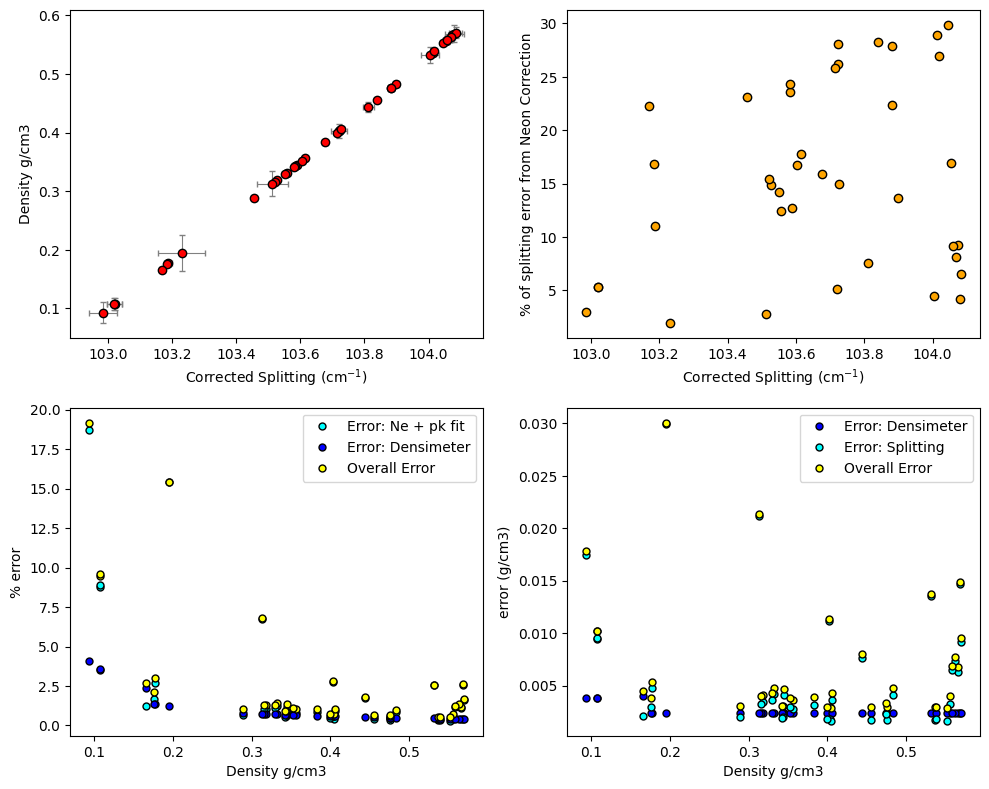

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

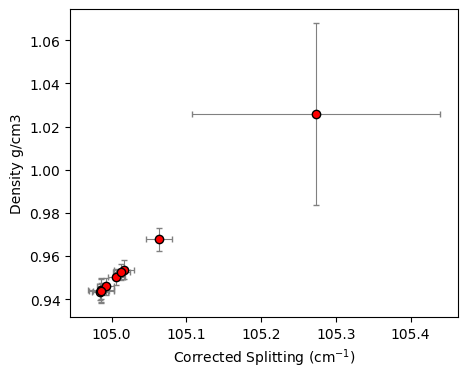

In [21]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [22]:
df


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
40,FG19-101-A-50X-rep1_prepinadjustment,0.944023,0.005854,0.005634,0.001592,104.986077,0.017873,0.001423,0.017852,6.129,...,NaN,NaN,NaN,NaN,NaN,NaN,37714.0,0.997988,0.997974,0.998001
41,FG19-101-A-50X-rep2_prepinadjustment,0.944010,0.005519,0.005284,0.001592,104.986035,0.016762,0.001421,0.016736,6.152,...,NaN,NaN,NaN,NaN,NaN,NaN,37863.0,0.997988,0.997974,0.998001
42,FG19-101-A-50X-rep3_prepinadjustment,0.967768,0.005376,0.005134,0.001596,105.063436,0.017188,0.001417,0.017164,6.127,...,NaN,NaN,NaN,NaN,NaN,NaN,38199.0,0.997987,0.997974,0.998000
43,FG19-101-A-50X-rep4,1.025764,0.042191,0.042160,0.001613,105.273370,0.166096,0.001405,0.166426,6.027,...,NaN,NaN,NaN,NaN,NaN,NaN,39328.0,0.997985,0.997972,0.997999
44,FG19-101-A-50X-rep5,0.945923,0.003966,0.003632,0.001592,104.992116,0.011570,0.001400,0.011508,6.060,...,NaN,NaN,NaN,NaN,NaN,NaN,39414.0,0.997985,0.997972,0.997998
45,FG19-101-A-50X-rep6,0.953603,0.004368,0.004067,0.001593,105.016789,0.013177,0.001397,0.013129,6.097,...,NaN,NaN,NaN,NaN,NaN,NaN,39693.0,0.997985,0.997971,0.997998
46,FG19-101-A-50X-rep7-12mw,0.943529,0.003735,0.003379,0.001592,104.984510,0.010708,0.001524,0.010620,11.965,...,NaN,NaN,NaN,NaN,NaN,NaN,58917.0,0.997954,0.997940,0.997969
47,FG19-101-A-50X-rep8-12mw,0.950398,0.003752,0.003397,0.001593,105.006442,0.010927,0.001530,0.010842,11.969,...,NaN,NaN,NaN,NaN,NaN,NaN,59161.0,0.997954,0.997939,0.997969
48,FG19-101-A-50X-rep9-12mw,0.943993,0.003706,0.003347,0.001592,104.985983,0.010616,0.001535,0.010526,11.965,...,NaN,NaN,NaN,NaN,NaN,NaN,59401.0,0.997954,0.997939,0.997968
39,FG19-101-A-50X-rep10,0.952520,0.003730,0.003373,0.001593,105.013284,0.010901,0.001542,0.010814,6.024,...,NaN,NaN,NaN,NaN,NaN,NaN,59666.0,0.997953,0.997939,0.997968


In [23]:
df[~(df['σ Density g/cm3']>0.04)].to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

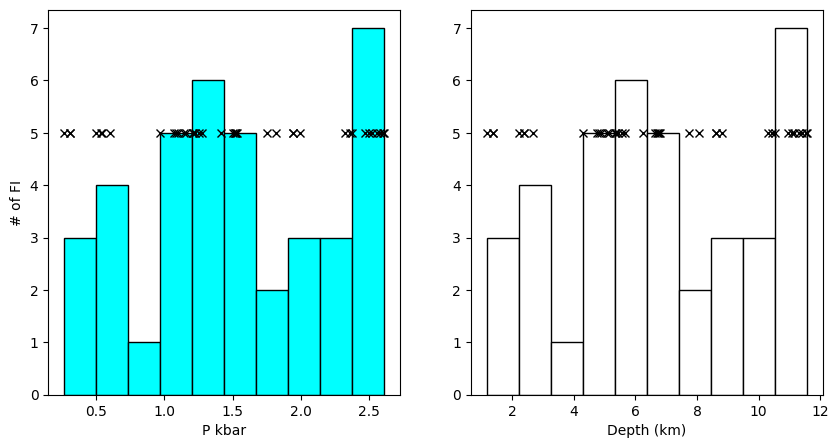

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3b_Secondary_Peaks is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()